# W266 Final Project - Amazon Reviews

This notebook is to read in the cleaned data and work with the data in keras.

http://jmcauley.ucsd.edu/data/amazon/links.html

In [94]:
import pandas as pd
import gzip
import random
from collections import defaultdict
import seaborn as sns
import numpy as np

In [5]:
files = ['reviews_Video_Games.json.gz', 
         'reviews_Toys_and_Games.json.gz', 
         'reviews_Sports_and_Outdoors.json.gz', 
         'reviews_Movies_and_TV.json.gz',
         'reviews_Kindle_Store.json.gz', 
         'reviews_Home_and_Kitchen.json.gz',
         'reviews_Health_and_Personal_Care.json.gz', 
         'reviews_Electronics.json.gz',
         'reviews_Clothing_Shoes_and_Jewelry.json.gz',
         'reviews_Cell_Phones_and_Accessories.json.gz', 
         'reviews_CDs_and_Vinyl.json.gz',
         'reviews_Books.json.gz']
filesNames = ['reviews_Video_Games', 
              'reviews_Toys_and_Games',
              'reviews_Sports_and_Outdoors', 
              'reviews_Movies_and_TV',
              'reviews_Kindle_Store', 
              'reviews_Home_and_Kitchen',
              'reviews_Health_and_Personal_Care', 
              'reviews_Electronics',
              'reviews_Clothing_Shoes_and_Jewelry',
              'reviews_Cell_Phones_and_Accessories', 
              'reviews_CDs_and_Vinyl',
              'reviews_Books']

def dataFullSets(original, concatData, name):
    currentData = original
    appendData = pd.read_csv('../Data/%s'%(concatData))
    appendData['Product'] = name
    newDF = pd.concat([currentData,appendData])
    return(newDF)

train_data = pd.read_csv('../Data/%s_train.csv'%(filesNames[0]))
train_data['Product'] = filesNames[0]
test_data = pd.read_csv('../Data/%s_test.csv'%(filesNames[0]))
test_data['Product'] = filesNames[0]
                        
for fileName in filesNames[1:]:
    concatName_train = str(fileName+'_train.csv')
    concatName_test = fileName+'_test.csv'
                        
    train_data = dataFullSets(train_data, concatName_train, fileName).sample(frac=1)
    test_data = dataFullSets(test_data, concatName_test, fileName).sample(frac=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [6]:
train_data

,Product,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,sentiment,summary,unixReviewTime
85937,reviews_Books,B00H9QRS6W,"[0, 0]",5.0,The story moves right along. My first book on...,"02 3, 2014",A1RQIEDZUE1W3V,Geraldine M Olsen,1,Good Book,1391385600
69276,reviews_Sports_and_Outdoors,B00AJRPX6U,"[0, 0]",1.0,This product rips very easily and cannot possi...,"03 27, 2013",A25KM2ZKEVRDFK,Dana K Lum,0,Angry Birds,1364342400
20932,reviews_Health_and_Personal_Care,B00HFQQ0VU,"[3, 3]",5.0,my demist has told be for years to get a water...,"03 8, 2014",A2KRUC7DU91382,Cindy Beasley,1,my demist has told be for years to get a sonca...,1394236800
30459,reviews_Electronics,B009XCCC52,"[0, 0]",5.0,Great price and great build quality. Love the ...,"03 30, 2013",A1Q9AKH3YZVDH0,Garrett Barker,1,Perfect case for the iPad Mini,1364601600
15037,reviews_CDs_and_Vinyl,B00004T3XL,"[0, 1]",5.0,I wish I could give this album ten stars but I...,"06 15, 2000",A26IQ71XV0AZ1D,Hapworth,1,Wish I Could Give It Ten Stars But...,961027200
40762,reviews_Clothing_Shoes_and_Jewelry,B0045RYBEA,"[0, 0]",5.0,Got these for my husband for our honeymoon for...,"08 26, 2013",A2G3SIL1FXQ359,Krysty,1,LOVE IT!,1377475200
74743,reviews_Health_and_Personal_Care,B004RSATUC,"[0, 0]",1.0,This chair will throw your client out of it. I...,"10 12, 2012",AXO2K4F2WR8YC,Sheri's Salon,0,Badly engineered!,1350000000
7049,reviews_Home_and_Kitchen,B00390TM5M,"[3, 3]",1.0,The description and picture of this product sa...,"08 25, 2013",AAAPMK9EN8XZC,Megan K.,0,this product isn't what they say it is,1377388800
96899,reviews_Books,111817206X,"[1, 2]",5.0,I purchased this book at a great price for one...,"02 23, 2014",A2KW7IHYT5L8YL,Ivory Pimp,1,Great Inform,1393113600
56878,reviews_Sports_and_Outdoors,B0083F0TQ4,"[5, 5]",5.0,I bought this because I had used the Klean Kan...,"09 8, 2013",AEW0RTFPVR6O0,Andrea E. Williams,1,Use it on a hydroflask,1378598400


In [7]:
test_data

,Product,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,sentiment,summary,unixReviewTime
12326,reviews_Home_and_Kitchen,B00004RDDN,"[0, 0]",1.0,"I bought it with high expectation, but actuall...","01 27, 2013",A18PBFEQ80INNE,CF,0,not useful,1359244800
18131,reviews_Cell_Phones_and_Accessories,B00478SCSI,"[0, 1]",1.0,"Cheap product, I don't know what else to say, ...","09 8, 2013",A34TSF1VMNHZ7E,Michael McNeill,0,had short in cord after 1 day,1378598400
7736,reviews_Cell_Phones_and_Accessories,B0035R2QS4,"[0, 0]",1.0,I GOT IT IT SEEMED TO BE CHARGED A BIT SO I PL...,"01 25, 2012",A3PCJ93LF7T3BL,ADAM,0,DO NOT BUY THIS MESS,1327449600
18944,reviews_Health_and_Personal_Care,B0082FKTI8,"[0, 0]",1.0,i tried these with diet and exercise and not l...,"02 21, 2014",AYDMEVKU90HGN,"Kerri Hammond ""kerri v hammond""",0,did not work,1392940800
12189,reviews_Home_and_Kitchen,B0009NMVRI,"[0, 0]",5.0,If you have a good knife you have to keep it s...,"03 11, 2014",AK00N929GM23D,Jeff M,1,Good purchase,1394496000
59,reviews_CDs_and_Vinyl,B0001CCWX0,"[3, 8]",1.0,As someone who has heard virtually all of Grah...,"03 24, 2004",AMNCPHKPZF9HH,Thomas,0,A Real Downer for Graham,1080086400
15701,reviews_CDs_and_Vinyl,B0000027G5,"[0, 0]",5.0,Great album to listen to if you want to go bac...,"05 9, 2013",A1H3O7TLUXOI6B,kimberly hunt,1,"Danger Danger ""Screw It"" Review",1368057600
13971,reviews_Toys_and_Games,0786958731,"[0, 1]",5.0,Bought this for my son. He is very hard to ple...,"06 5, 2013",A1DAXGNIWKK1PJ,stumpy,1,love it,1370390400
5688,reviews_Toys_and_Games,B004EDZ8RO,"[0, 0]",5.0,The dogs as well as the people love this flyin...,"01 2, 2014",A2BF1IDDK1BIG0,Waterhog,1,Fun!,1388620800
12540,reviews_Sports_and_Outdoors,B001F4PYBK,"[0, 0]",5.0,These handcuffs are going to be used for when ...,"11 10, 2012",A3G07RGZ1PWP8R,Jonathan H.,1,"For the price, it's a good product.",1352505600


In [83]:
play_data = test_data[:10]
#print(play_data)
def splitWords(data):
    return str(data['reviewText']).split()

sentences = play_data.apply(splitWords, axis=1)
play_data.insert(loc = 11, column = 'sentenceWords', value = sentences)

sentences = train_data.apply(splitWords, axis=1)
train_data.insert(loc = 11,column = 'sentenceWords', value = sentences)

sentences = test_data.apply(splitWords, axis=1)
test_data.insert(loc = 11,column = 'sentenceWords', value = sentences)

In [85]:
train_data

,Product,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,sentiment,summary,unixReviewTime,sentenceWords
85937,reviews_Books,B00H9QRS6W,"[0, 0]",5.0,The story moves right along. My first book on...,"02 3, 2014",A1RQIEDZUE1W3V,Geraldine M Olsen,1,Good Book,1391385600,"[The, story, moves, right, along., My, first, ..."
69276,reviews_Sports_and_Outdoors,B00AJRPX6U,"[0, 0]",1.0,This product rips very easily and cannot possi...,"03 27, 2013",A25KM2ZKEVRDFK,Dana K Lum,0,Angry Birds,1364342400,"[This, product, rips, very, easily, and, canno..."
20932,reviews_Health_and_Personal_Care,B00HFQQ0VU,"[3, 3]",5.0,my demist has told be for years to get a water...,"03 8, 2014",A2KRUC7DU91382,Cindy Beasley,1,my demist has told be for years to get a sonca...,1394236800,"[my, demist, has, told, be, for, years, to, ge..."
30459,reviews_Electronics,B009XCCC52,"[0, 0]",5.0,Great price and great build quality. Love the ...,"03 30, 2013",A1Q9AKH3YZVDH0,Garrett Barker,1,Perfect case for the iPad Mini,1364601600,"[Great, price, and, great, build, quality., Lo..."
15037,reviews_CDs_and_Vinyl,B00004T3XL,"[0, 1]",5.0,I wish I could give this album ten stars but I...,"06 15, 2000",A26IQ71XV0AZ1D,Hapworth,1,Wish I Could Give It Ten Stars But...,961027200,"[I, wish, I, could, give, this, album, ten, st..."
40762,reviews_Clothing_Shoes_and_Jewelry,B0045RYBEA,"[0, 0]",5.0,Got these for my husband for our honeymoon for...,"08 26, 2013",A2G3SIL1FXQ359,Krysty,1,LOVE IT!,1377475200,"[Got, these, for, my, husband, for, our, honey..."
74743,reviews_Health_and_Personal_Care,B004RSATUC,"[0, 0]",1.0,This chair will throw your client out of it. I...,"10 12, 2012",AXO2K4F2WR8YC,Sheri's Salon,0,Badly engineered!,1350000000,"[This, chair, will, throw, your, client, out, ..."
7049,reviews_Home_and_Kitchen,B00390TM5M,"[3, 3]",1.0,The description and picture of this product sa...,"08 25, 2013",AAAPMK9EN8XZC,Megan K.,0,this product isn't what they say it is,1377388800,"[The, description, and, picture, of, this, pro..."
96899,reviews_Books,111817206X,"[1, 2]",5.0,I purchased this book at a great price for one...,"02 23, 2014",A2KW7IHYT5L8YL,Ivory Pimp,1,Great Inform,1393113600,"[I, purchased, this, book, at, a, great, price..."
56878,reviews_Sports_and_Outdoors,B0083F0TQ4,"[5, 5]",5.0,I bought this because I had used the Klean Kan...,"09 8, 2013",AEW0RTFPVR6O0,Andrea E. Williams,1,Use it on a hydroflask,1378598400,"[I, bought, this, because, I, had, used, the, ..."


In [84]:
wordFreq = defaultdict(int)

wordData = train_data['sentenceWords']

for row in wordData:
    for word in row:
        wordFreq[word] += 1      

In [98]:
wordsForHist = list(wordFreq.values())

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Word Frequency for Train Data')

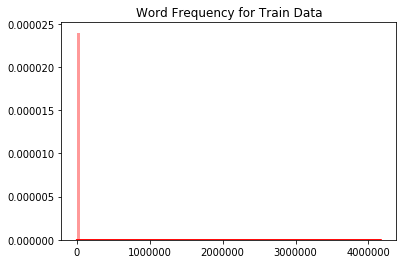

In [99]:
sns.distplot(wordsForHist, bins=100, color = 'red').set_title('Word Frequency for Train Data')

In [102]:
reviewLength = []

for row in wordData:
    reviewLength.append(len(row))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sentence Lengths for Train Data')

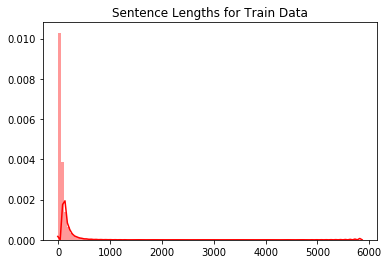

In [105]:
sns.distplot(reviewLength, bins=100, color = 'red').set_title('Sentence Lengths for Train Data')